# Networkxライブラリによるダイクストラ法

## インストールが必要なライブラリ

In [1]:
!pip install networkx

## ライブラリのインポート

In [2]:
import networkx as nx

## 経路の設定（１）：接続情報

connect:どのノードとつながっているのか

cost:ノード間のコスト（距離のようなもの）

In [3]:
connect = [[1, 2], [2,  3,  4], [1, 4], [1, 4, 5], [1, 3, 5], []]
cost = [[2, 3], [3,  1,  2], [3, 2], [1, 2, 3], [2, 2, 1], []]

## 経路の設定（２）：NetworkX用に直す

最初の2つの数字：つながっているノード番号

最後の数字：コスト

In [4]:
weight_route = []

for i1,i2 in enumerate(connect):
  for j1,j2 in enumerate(i2):
    print(i1,j2,cost[i1][j1])
    weight_route.append((i1,j2,cost[i1][j1]))

0 1 2
0 2 3
1 2 3
1 3 1
1 4 2
2 1 3
2 4 2
3 1 1
3 4 2
3 5 3
4 1 2
4 3 2
4 5 1


## スタートとゴールの設定

source:スタート、destination:ゴール

In [5]:
source = 0
destination = 5

## ダイクストラ法により経路を求める

In [21]:
#G = nx.MultiDiGraph()
G = nx.Graph()#これでも計算できる
G.add_weighted_edges_from(weight_route)
dijkstra_path = nx.dijkstra_path(G, source, destination)
dijkstra_cost = nx.dijkstra_path_length(G, source, destination)

## 求めた経路と合計コスト

In [22]:
print(f"path: {dijkstra_path}, cost: {dijkstra_cost}")

path: [0, 1, 4, 5], cost: 5


## 以下、可視化するための処理

たどった経路の線を太くするためのデータ作成

In [29]:
edge_weights = []
edge_flag = False
for i in G.edges:
  edge_flag = False
  for j in range(len(dijkstra_path)-1):
    if dijkstra_path[j]==i[0] and dijkstra_path[j+1]==i[1]:
      edge_flag=True
      break
  if edge_flag==True:
    edge_weights.append(2)
  else:
    edge_weights.append(0.2)

可視化

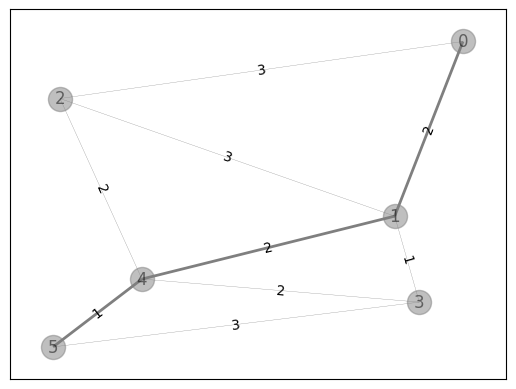

In [30]:
pos = nx.kamada_kawai_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos, edge_labels = labels)
nx.draw_networkx(G, pos, with_labels=True, node_size=300, node_color="grey", width=edge_weights, alpha=0.5)